In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append("..")


from graph import get_ba, get_er, get_rr
from graph.utils import get_edge_list
from kuramoto.plot import plot, plot_image
from kuramoto.simulation import argument
from kuramoto.simulation.solve import solve
from kuramoto.trajectory import get_order_parameter
from neural_rk.path import FIG_DIR

In [20]:
args = argument.get_args(
    [
        "--num_nodes", "100",
        "--network_type", "rr",
        "--mean_degree", "4.0",
        "--coupling", "0.5",
        "--seed", "0",
    ]
)


In [21]:
rng = np.random.default_rng(args.seed)

# Graph setting
network_type = argument.get_network_type(args.network_type, rng)
num_nodes = argument.get_num_nodes(args.num_nodes, rng)
mean_degree = argument.get_mean_degree(args.mean_degree, rng)

if network_type == "er":
    graph = get_er(num_nodes, mean_degree, rng=rng)
elif network_type == "ba":
    graph = get_ba(num_nodes, mean_degree, rng=rng)
else:
    graph = get_rr(num_nodes, mean_degree, rng=rng)

# Since only gcc is selected, the graph can have smaller num_nodes
num_nodes = graph.number_of_nodes()
num_edges = graph.number_of_edges()
edge_list = get_edge_list(graph)


dts = argument.get_dt(
    args.max_time, args.steps, args.dt_delta, tuple(args.dt_clip), rng
)
time = np.insert(np.cumsum(dts), 0, 0.0)

# params(omega, coupling) setting
omega = argument.get_omega(num_nodes, args.omega, rng)
coupling = argument.get_coupling(num_edges, args.coupling, rng)

# Initial condition setting
initial_phase = argument.get_initial_condition(num_nodes, rng)


In [22]:
phases = solve(args.solver, graph, coupling, initial_phase, dts, omega)


# Plot

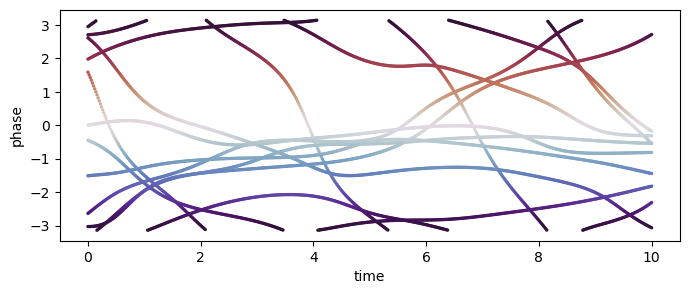

In [23]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.set_rasterized(True)

plot(ax, phases, time, nodes=10)
ax.set_xlabel("time")
ax.set_ylabel("phase")

fig.show()

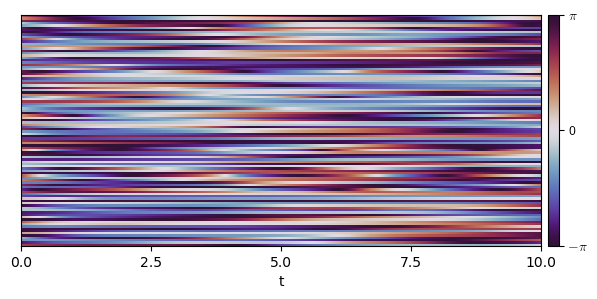

In [26]:
fig, ax = plt.subplots(figsize=(8, 3))

xticks = np.round(np.linspace(0.0, time[-1], 5), 2)
im = plot_image(ax, phases, xticks=xticks)
cbar = fig.colorbar(im, ax=ax, location="right", pad=0.01, ticks=[-np.pi, 0.0, np.pi])
cbar.ax.set_yticklabels([r"$-\pi$", 0, r"$\pi$"], usetex=True)
ax.set_xlabel("t")

fig.savefig(str(FIG_DIR / "kuramoto_example.png"))
fig.show()

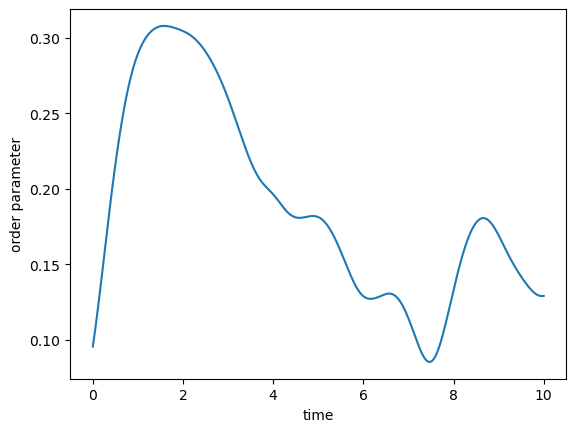

In [25]:
fig, ax = plt.subplots()

order_parameter = get_order_parameter(phases)
ax.plot(time, order_parameter)
ax.set_xlabel("time")
ax.set_ylabel("order parameter")
fig.show()